In [259]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import cv2
import math

Pobieram zdjęcie Trumpa

In [260]:

DataDir = "./trump_photos"
Categories = ["Trump", "No_trump"]
img_arrayTrump = []
max_images=0
for img in os.listdir(DataDir):
    img_array = cv2.imread(os.path.join(DataDir, img), cv2.IMREAD_GRAYSCALE)
    resized_img = cv2.resize(img_array, (128, 128))
    img_arrayTrump.append(resized_img)
    max_images=max_images+1
    if max_images>2000:
        break



Pobieram losowe osoby

In [261]:
DataDir="./Humans"
Categories=["Trump","No_trump"]
img_array_random_people=[]
max_images=0
for img in os.listdir(DataDir):
    img_array=cv2.imread(os.path.join(DataDir,img),cv2.IMREAD_GRAYSCALE)
    resized_img=cv2.resize(img_array,(128,128))
    img_array_random_people.append(resized_img)
    max_images=max_images+1
    if max_images>2000:
        break

Zmieniam rozmiar zdjęcia

In [262]:
len(img_array_random_people)

2001

In [263]:
array_categories_trump = np.full(len(img_arrayTrump), 1)
array_categories_trump

array([1, 1, 1, ..., 1, 1, 1])

In [264]:
array_categories_random_people = np.full(len(img_array_random_people), 0)


In [265]:
img_arrayTrump

[array([[ 18, 135, 156, ...,  92, 108, 108],
        [ 19,  31, 110, ...,  94, 101,  91],
        [ 17,  48,  36, ...,  90, 105,  97],
        ...,
        [  9,   7,   6, ...,  10,  17,  15],
        [  9,   9,   4, ...,  18,  19,  17],
        [  7,   6,   2, ...,  13,  14,  17]], dtype=uint8),
 array([[ 72,  70,  74, ...,  61,  62,  61],
        [ 78,  80,  72, ...,  62,  64,  63],
        [ 83,  85,  83, ...,  62,  63,  62],
        ...,
        [ 88, 104, 101, ...,  67,  53,  52],
        [103, 103, 105, ...,  62,  58,  58],
        [105, 111, 129, ...,  61,  59,  56]], dtype=uint8),
 array([[  1,   2,   5, ...,   1,   1,   1],
        [  1,   2,   4, ...,   1,   1,   1],
        [  1,   2,   5, ...,   1,   1,   1],
        ...,
        [132, 139,  32, ..., 137,  25,  28],
        [133, 140,  29, ..., 140,  46,  34],
        [146, 143,  60, ..., 156, 103,  36]], dtype=uint8),
 array([[ 30,  30,  30, ..., 170, 171, 170],
        [ 31,  31,  30, ..., 169, 170, 169],
        [ 31,  3

In [266]:
array_faces=np.concatenate((img_arrayTrump,img_array_random_people),axis=0)

In [267]:
len(img_arrayTrump)

2001

In [268]:
img_array_random_people

[array([[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [135, 138, 136, ...,  23,  21,  21],
        [125, 127, 125, ...,  21,  17,  17],
        [115, 113, 112, ...,  18,  16,  15]], dtype=uint8),
 array([[213, 213, 211, ..., 210, 210, 208],
        [212, 215, 218, ..., 212, 212, 208],
        [212, 215, 218, ..., 212, 212, 212],
        ...,
        [202, 205, 207, ..., 188, 191, 186],
        [200, 202, 203, ..., 188, 186, 183],
        [195, 198, 199, ..., 184, 181, 183]], dtype=uint8),
 array([[104, 100,  97, ...,   0,   4,  19],
        [ 96,  98,  93, ...,   2,  21,  21],
        [ 89,  98,  93, ...,  21,  21,  28],
        ...,
        [ 48,  42,  19, ...,  44,  55,  45],
        [ 46,  32,  22, ...,  45,  73,  54],
        [ 45,  24,  13, ...,  56,  74,  80]], dtype=uint8),
 array([[157, 146, 128, ..., 201, 199, 198],
        [149, 154, 138, ..., 198, 195, 195],
        [157, 13

In [269]:
array_categories=np.concatenate((array_categories_trump,array_categories_random_people))


In [270]:
import tensorflow as tf
from tensorflow import keras

1

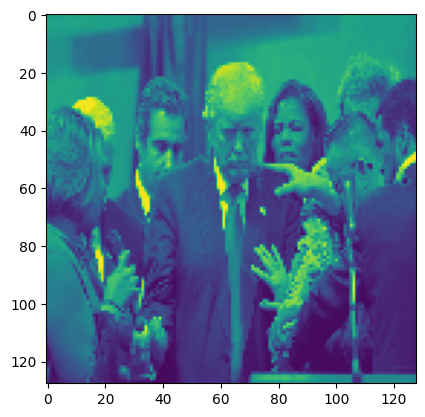

In [271]:
plt.imshow(array_faces[550])
array_categories[550]

In [272]:
dataset_face=array_faces/255
dataset_face

array([[[0.07058824, 0.52941176, 0.61176471, ..., 0.36078431,
         0.42352941, 0.42352941],
        [0.0745098 , 0.12156863, 0.43137255, ..., 0.36862745,
         0.39607843, 0.35686275],
        [0.06666667, 0.18823529, 0.14117647, ..., 0.35294118,
         0.41176471, 0.38039216],
        ...,
        [0.03529412, 0.02745098, 0.02352941, ..., 0.03921569,
         0.06666667, 0.05882353],
        [0.03529412, 0.03529412, 0.01568627, ..., 0.07058824,
         0.0745098 , 0.06666667],
        [0.02745098, 0.02352941, 0.00784314, ..., 0.05098039,
         0.05490196, 0.06666667]],

       [[0.28235294, 0.2745098 , 0.29019608, ..., 0.23921569,
         0.24313725, 0.23921569],
        [0.30588235, 0.31372549, 0.28235294, ..., 0.24313725,
         0.25098039, 0.24705882],
        [0.3254902 , 0.33333333, 0.3254902 , ..., 0.24313725,
         0.24705882, 0.24313725],
        ...,
        [0.34509804, 0.40784314, 0.39607843, ..., 0.2627451 ,
         0.20784314, 0.20392157],
        [0.4

In [273]:
num_samples = dataset_face.shape[0]
shuffled_indices=np.random.permutation(num_samples)
shuffled_indices
dataset_face_shuffled=dataset_face[shuffled_indices]
categories_shuffled=array_categories[shuffled_indices]


1


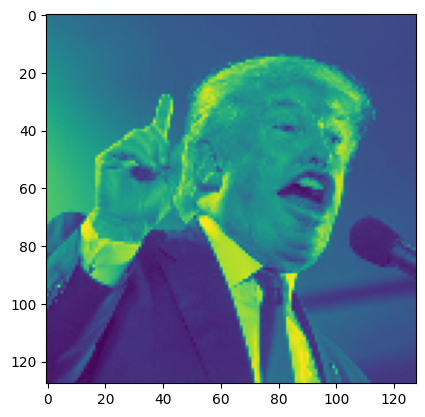

In [274]:
print(categories_shuffled[200])
plt.imshow(dataset_face_shuffled[200])

In [275]:
threshold_first=math.floor(0.6*len(dataset_face))
threshold_secound=math.floor(0.8*len(dataset_face))
X_test,X_train,X_valid= dataset_face[:threshold_first], dataset_face_shuffled[threshold_first:threshold_secound],dataset_face_shuffled[threshold_secound:]
y_test,y_train,y_valid= categories_shuffled[:threshold_first],categories_shuffled[threshold_first:threshold_secound],categories_shuffled[threshold_secound:]

In [276]:
np.random.seed(42)
tf.random.set_seed(42)

In [284]:
model= keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[128,128]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [285]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 16384)             0         
                                                                 
 dense_9 (Dense)             (None, 300)               4915500   
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,946,610
Trainable params: 4,946,610
Non-trainable params: 0
_________________________________________________________________


In [286]:
weight, biases = model.layers[1].get_weights()
weight

array([[ 0.01126958,  0.01867222, -0.00802782, ...,  0.01226529,
         0.01264471, -0.00393753],
       [-0.00186971,  0.01023566, -0.00569837, ..., -0.01492787,
         0.00647748,  0.01320934],
       [-0.00819221, -0.00982374, -0.01362267, ..., -0.00139756,
         0.00917104, -0.015252  ],
       ...,
       [-0.01346471,  0.01323319,  0.00943053, ...,  0.0074993 ,
         0.00244207,  0.00289359],
       [-0.0133653 , -0.01208847, -0.01777977, ..., -0.01241404,
        -0.00390871,  0.00587947],
       [-0.00767996,  0.00712097, -0.00629346, ..., -0.00924338,
        -0.00893345,  0.0005358 ]], dtype=float32)

In [287]:
weight.shape

(16384, 300)

In [288]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [289]:
model_history=model.fit(X_train,y_train, epochs=30,
                    validation_data=(X_valid,y_valid))

Epoch 1/30


25/25 [==============================] - 1s 30ms/step - loss: 0.9244 - accuracy: 0.6000 - val_loss: 1.0542 - val_accuracy: 0.4956
Epoch 2/30
25/25 [==============================] - 1s 21ms/step - loss: 0.5829 - accuracy: 0.7163 - val_loss: 0.6213 - val_accuracy: 0.7079
Epoch 3/30
25/25 [==============================] - 1s 21ms/step - loss: 0.5119 - accuracy: 0.7663 - val_loss: 0.6200 - val_accuracy: 0.6592
Epoch 4/30
25/25 [==============================] - 1s 21ms/step - loss: 0.5430 - accuracy: 0.7387 - val_loss: 0.8814 - val_accuracy: 0.6067
Epoch 5/30
25/25 [==============================] - 1s 21ms/step - loss: 0.4766 - accuracy: 0.7950 - val_loss: 0.5234 - val_accuracy: 0.7253
Epoch 6/30
25/25 [==============================] - 0s 20ms/step - loss: 0.4902 - accuracy: 0.7825 - val_loss: 0.4924 - val_accuracy: 0.7478
Epoch 7/30
25/25 [==============================] - 0s 20ms/step - loss: 0.4393 - accuracy: 0.8025 - val_loss: 0.4536 - val_accuracy: 0.7728
Epoch 8/30
25/25 [======

In [290]:
my_img = cv2.imread(os.path.join("myImage.jpg"), cv2.IMREAD_GRAYSCALE)
resized_my_img=cv2.resize(my_img,(128,128))
resized_my_img
my_img=resized_my_img/255

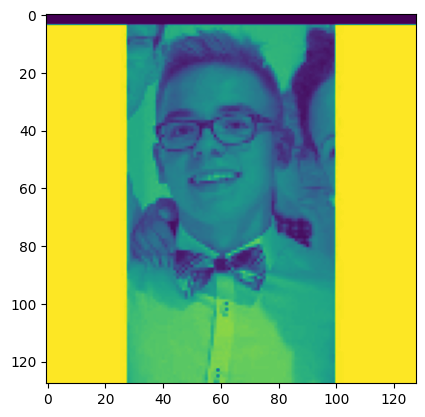

In [291]:
plt.imshow(my_img)

In [301]:
X_new=X_test[:1]
y_prob=model.predict(X_new)
y_prob.round(2)

1/1 [==============================] - 0s 26ms/step


array([[0.41, 0.59, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [302]:
y_pred= model.predict(X_new)
y_pred_classes=np.argmax(y_pred,axis=1)

1/1 [==============================] - 0s 23ms/step


In [303]:
y_pred_classes


array([1], dtype=int64)

In [305]:
X_new

array([[[0.07058824, 0.52941176, 0.61176471, ..., 0.36078431,
         0.42352941, 0.42352941],
        [0.0745098 , 0.12156863, 0.43137255, ..., 0.36862745,
         0.39607843, 0.35686275],
        [0.06666667, 0.18823529, 0.14117647, ..., 0.35294118,
         0.41176471, 0.38039216],
        ...,
        [0.03529412, 0.02745098, 0.02352941, ..., 0.03921569,
         0.06666667, 0.05882353],
        [0.03529412, 0.03529412, 0.01568627, ..., 0.07058824,
         0.0745098 , 0.06666667],
        [0.02745098, 0.02352941, 0.00784314, ..., 0.05098039,
         0.05490196, 0.06666667]]])

In [308]:
my_img=np.array([my_img])
my_img


array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.99607843, 0.99607843, 0.99607843, ..., 0.99607843,
          0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843, ..., 0.99607843,
          0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843, ..., 0.99607843,
          0.99607843, 0.99607843]]]])

In [310]:
pred=model.predict(my_img)
pred_classes=np.argmax(pred,axis=1)
pred_classes

1/1 [==============================] - 0s 64ms/step


array([0], dtype=int64)